In [1]:
import hello as hell
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
help(hell.Particula)

Help on class Particula in module hello:

class Particula(builtins.object)
 |  Particula(posicion, velocidad, masa, radio)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, posicion, velocidad, masa, radio)
 |      comenzamos definiendo el método que debe 
 |      inicializar la clase, en este definimos los atributos básicos de la clase partícula
 |      las entradas masa y radio son de tipo float y las entradas de posición son tuplas conformadas por floats
 |  
 |  paso_dt(self, dt)
 |      Este método lo que hace es avanzar en el tiempo, cambia la posición de la partícula
 |  
 |  resolver_colision_esquina(self)
 |      Método que actualiza la velocidad después de que una partícula choca con una esquina
 |  
 |  resolver_colision_muro(self, Lx, Ly)
 |      #Método que actualiza la velocidad después de que una partícula choca con un muro. Recibe la
 |      partícula y las dimensiones de la caja
 |  
 |  resolver_colision_particula(self, otra_p)
 |      Método que actualiza las ve

In [3]:

#Prototipo de la función final, recibe las dimensiones de la caja, el rango de velocidades inciales y el número de partículas
#Si algo podemos establecer por defecto que las masas y los radios sean los mismos por defecto o cómo quieran
def funcion_simuladora(lx,ly,v1,v2,m,r,n,):
#Por el momento se crea un arreglo vacío de enteros para las posiciones iniciales
  posiciones=np.zeros((n,2))
  
  for i in range(n):
    #Se llena el arreglo con números aleatorios dentro del rango de las dimensiones de la caja
    posiciones[i][0]=np.random.uniform(10,lx-10)
    posiciones[i][1]=np.random.uniform(10,ly-10)
  #Se convierte el arreglo en una lista
  posiciones_lista=list(posiciones)
  #Las velocidades se crean normalmente con velocidades aleatorias dentro del rango establecido, el intervalo (v1,v2)
  velocidades_lista=list(np.random.uniform(v1,v2,(n,2)))
  #Ahora creamos una lista vacía donde irán objetos de la clase partícula
  lista_de_particulas=[]
  #Llenamos la lista con partículas que tendrán posiciones provenientes de posiciones_lista y velocidades_lista, le puse una masa y un radio aleatorio 
  #entre 0 y 5.
  for j in range(n):
    Pn=hell.Particula(tuple(posiciones_lista[j]),tuple(velocidades_lista[j]),m,r)
    lista_de_particulas.append(Pn)
  
  
  #Ahora queremeos hacer que si las partículas se crean superpuestas de alguna manera, eliminamos una y creamos otra nueva
  #luego añadimos la nueva partícula a la lista de partículas

  for i in range(n):
   for p1 in lista_de_particulas:
    for p2 in lista_de_particulas:
        
     if p1.ver_colision_pp(p2):
       p_nueva=hell.Particula(tuple([(random.uniform(0,lx),random.uniform(0,ly)) for x in range(1)][0]),
       tuple([(random.uniform(v1,v2),random.uniform(v1,v2)) for x in range(1)][0]), m,r)
                                                      
       lista_de_particulas.pop(i)
       lista_de_particulas.append(p_nueva)
  #Nos retorna la lista con las partículas creadas, acá le puse que me devolviera solo la primera para demostrar funcionalidad

  return lista_de_particulas


In [71]:
def listas_para_llenar_posiciones(n): ###Recibe el número de partículas y crea una lista con sublistas. 
    lista_principal = []   ###Cada partícula tiene una lista que ocupa una posicion en lista_principal
    for j in range(n):     ###y a su vez estas listas tienen dos listas para almacenar la información 
        lista_principal.append([[],[]]) ###de la posición en x y y de esa partícula.
    return lista_principal

def listas_para_llenar_velocidad(nt): ###Recibe la cantidad de pasos y genera una lista con listas para cada paso
    lista_principal = []
    for j in range(nt):
        lista_principal.append([])
    return lista_principal

def listas_para_llenar_componentes_velocidad(n):
    lista_principal = []   ###Cada partícula tiene una lista que ocupa una posicion en lista_principal
    for j in range(n):     ###y a su vez estas listas tienen dos listas para almacenar la información 
        lista_principal.append([[],[]]) ###de la velocidad en x y y de esa partícula.
    return lista_principal
listas_para_llenar_componentes_velocidad(1)

[[[], []]]

In [80]:
#Parametros simulación
v1 = 50
v2 = 75
dt = 0.01 #tamaño del paso
Lx = 200 #Tamñaño de la caja 
Ly = 200
#nt = 50 #número de pasos
n = 150 #número de partículas
m = 1 #masa 
r = 2 #radio
par = funcion_simuladora(Lx,Ly,v1,v2,m,r,n)

In [54]:
listas_para_llenar_velocidad(2)

[[], []]

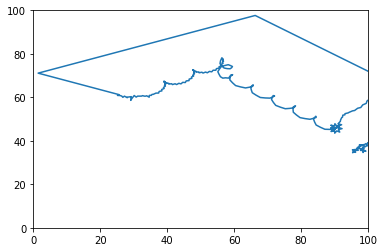

In [82]:
nt = 2000
lista_posiciones = listas_para_llenar_posiciones(n)
#lista_magnitudes_velocidad = listas_para_llenar_velocidad(nt) #Esta lista tiene los datos de la magnitud de las
                                                              #velocidades en cada paso
lista_velocidades = listas_para_llenar_componentes_velocidad(n)

for j in range(nt):

    for k in range(n):
        lista_posiciones[k][0].append(par[k].posicion[0])  #Se añade la posición en x de cada partícula
        lista_posiciones[k][1].append(par[k].posicion[1])  #Se añade la posicion en y de cada partícula
        lista_velocidades[k][0].append(par[k].velocidad[0]) #Se añade la velocidad en x de cada partícula
        lista_velocidades[k][1].append(par[k].velocidad[1]) #Se añade la velocidad en y de cada partícula
    for p in par:     
        for i in range(par.index(p)+1,n): #Revisamos las colisiones entre partículas
            if  p.posicion[0] == par[i].posicion[0] and p.posicion[1] == par[i].posicion[1]:
                continue 
            
            elif p.ver_colision_pp(par[i])  :
                #print("CHOQUE")
                p.resolver_colision_particula(par[i])
    for p in par: 
        if p.ver_colision_muro(Lx,Ly): #Revisamos las condiciones de choque con la caja
            p.resolver_colision_muro(Lx,Ly)
        elif p.ver_colision_esquina(Lx,Ly): #Revisamos las condiciones de choque con las esquinas
            p.resolver_colision_esquina()
        p.paso_dt(dt)

plt.plot(lista_posiciones[0][0],lista_posiciones[0][1])
#plt.plot(lista_posiciones[1][0],lista_posiciones[1][1])
#plt.plot(lista_posiciones[2][0],lista_posiciones[2][1])

plt.xlim((0,100))
plt.ylim((0,100))
plt.show()



In [83]:
#Los datos de las velocidades en .csv
import csv 
with open('datos_velocidades_en_x','w',newline = '') as file:
    writer = csv.writer(file)
    for j in range(n):
        writer.writerow(lista_velocidades[j][0])


In [84]:
#Los datos de las velocidades en .csv
import csv 
with open('datos_velocidades_en_y','w',newline = '') as file:
    writer = csv.writer(file)
    for j in range(n):
        writer.writerow(lista_velocidades[j][1])

In [63]:
for p in par:
    print(p.velocidad)

[  50.58733792 -105.56728296]
[32.17956322 31.46319188]
[-44.28395965  65.22204276]
[-17.03339974 -14.50747146]
[ 58.10143277 -17.45299201]
[-25.81551925 -78.6282893 ]
[  67.79534674 -119.94516698]
[34.86003992 75.13494827]
[-63.15089311 -58.34185203]
[ -53.46225645 -107.78689914]


In [76]:
lista_velocidades[0]

[[52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  52.8878173828125,
  -8.818903000844593,
  -8.8189030008445

In [48]:
par[0].velocidad

array([ 85.88483414, -70.7961825 ])